In [1]:
import numpy as np
import xarray as xr
import dask as da
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
dss = xr.open_dataset('../results/final.nc', chunks={'i': 10, 'i_g': 10})

In [3]:
print(dss)

<xarray.Dataset>
Dimensions:    (i: 416, i_g: 416, j: 128, j_g: 128, k: 400, k_l: 400, k_p1: 401, k_u: 400, record: 3)
Coordinates:
  * record     (record) int32 1 2 3
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k          (k) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_l        (k_l) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_u        (k_u) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_p1       (k_p1) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
    XC         (j, i) float64 492.3 1.477e+03 2.462e+03 3.446e+03 4.431e+03 ...
    XG         (j_g, i_g) float64 2.274e-13 984.6 1.969e+03 2.954e+03 ...
    YC         (j, i) float64 462.5 46

In [4]:
print(type(dss.PHIHYD.data))


<class 'dask.array.core.Array'>


In [5]:
print(ds)

NameError: name 'ds' is not defined

<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
Data variables:
    Bf       (Z) float64 ...
    dWPdz    (Z) float64 ...
    dEdt     (Z) float64 ...
    resid    (Z) float64 ...
    area     float64 ...
-9.820272219759918


<IPython.core.display.Javascript object>


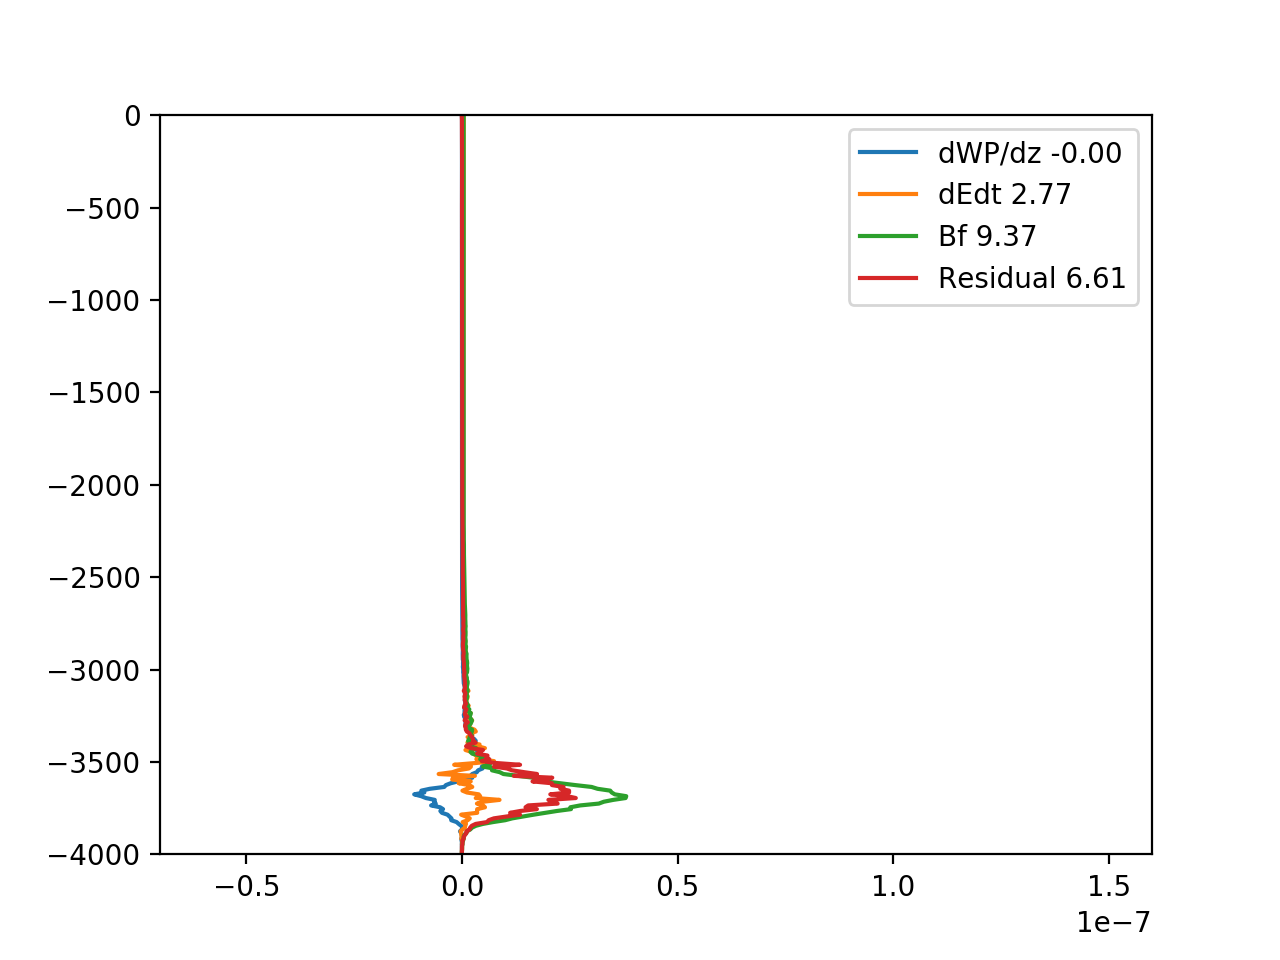

In [3]:
with xr.open_dataset('../reduceddata/EnergyDemeanLW1kmlowU10Amp155K18.nc') as en:
    print(en)
    print(-en.dWPdz.sum().values * 10)
    area2 = en.area / 1e6
    fig, ax = plt.subplots()
    ax.plot(-en.dWPdz / en.area , en.Z, label='dWP/dz %1.2f' % (-en.dWPdz.sum().values  * 10 / area2))
    ax.plot(en.dEdt / en.area, en.Z, label='dEdt %1.2f'  % (en.dEdt.sum().values  * 10 / area2))
    ax.plot(en.Bf / en.area, en.Z, label='Bf %1.2f' % (en.Bf.sum().values  * 10 / area2))
    ax.plot(en.resid / en.area, en.Z, label='Residual %1.2f' % (en.resid.sum().values  * 10 / area2))
    ax.set_ylim(-4000, 000)
    ax.legend()
    ax.set_xlim([-0.7e-7, 1.6e-7])

## get totals

<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
Data variables:
    Bf       (Z) float64 ...
    dWPdz    (Z) float64 ...
    dEdt     (Z) float64 ...
    resid    (Z) float64 ...
    area     float64 ...
-9.820272219759918


<IPython.core.display.Javascript object>


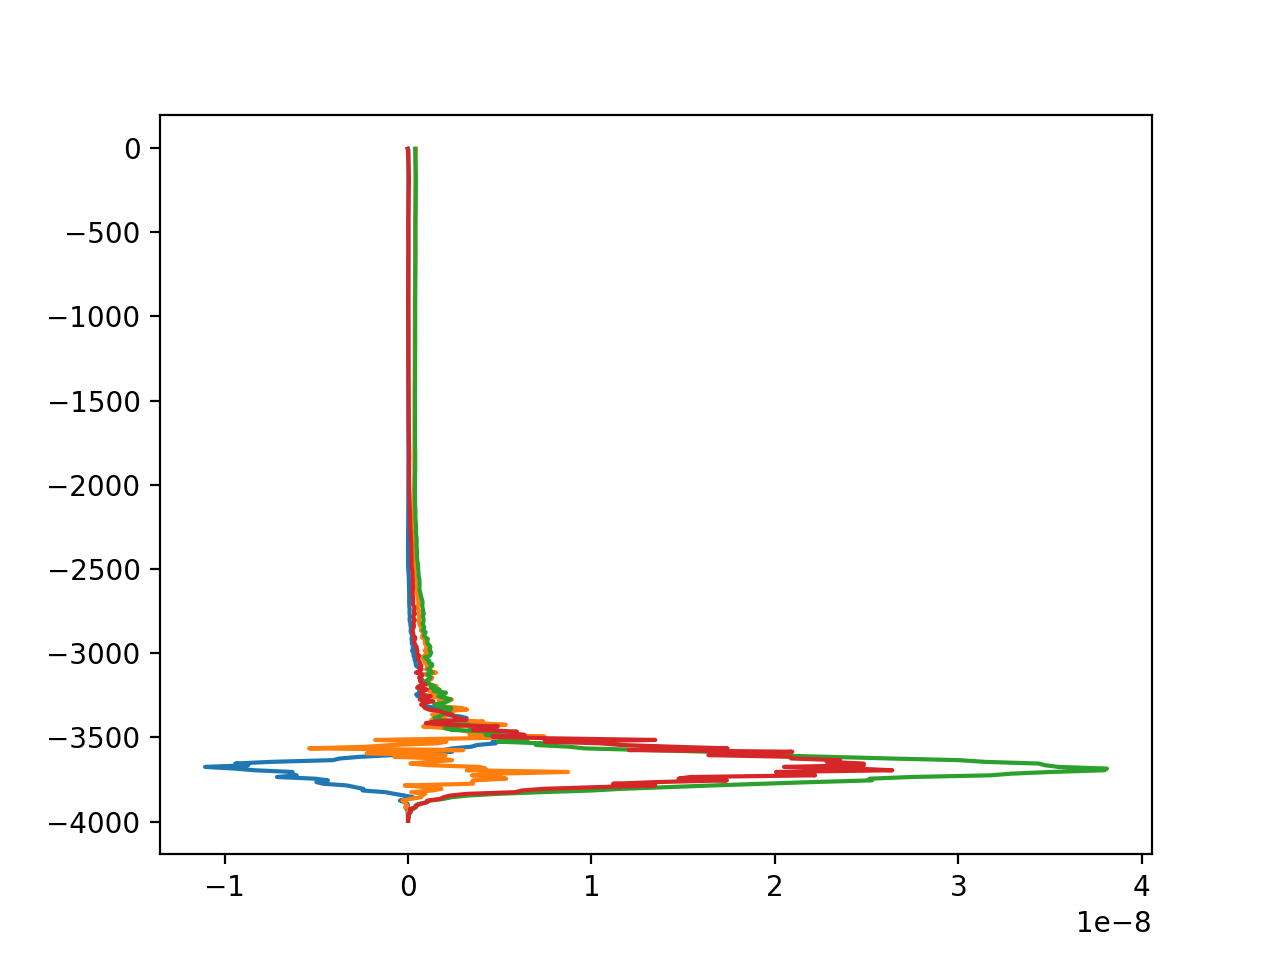

<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
Data variables:
    Bf       (Z) float64 ...
    dWPdz    (Z) float64 ...
    dEdt     (Z) float64 ...
    resid    (Z) float64 ...
    area     float64 ...
-34.72646221000443


<IPython.core.display.Javascript object>


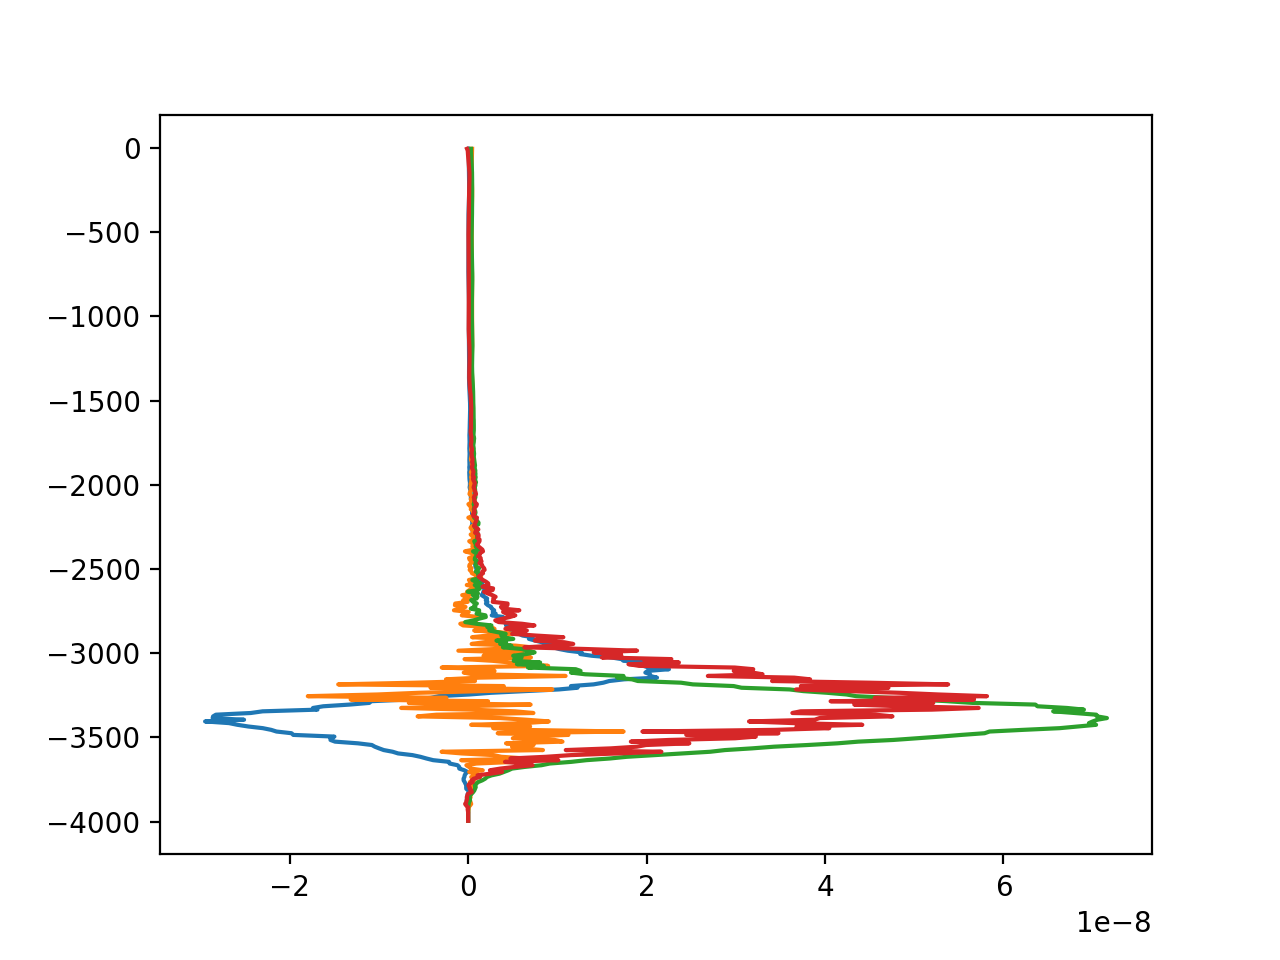

<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
Data variables:
    Bf       (Z) float64 ...
    dWPdz    (Z) float64 ...
    dEdt     (Z) float64 ...
    resid    (Z) float64 ...
    area     float64 ...
142.95473329342914


<IPython.core.display.Javascript object>


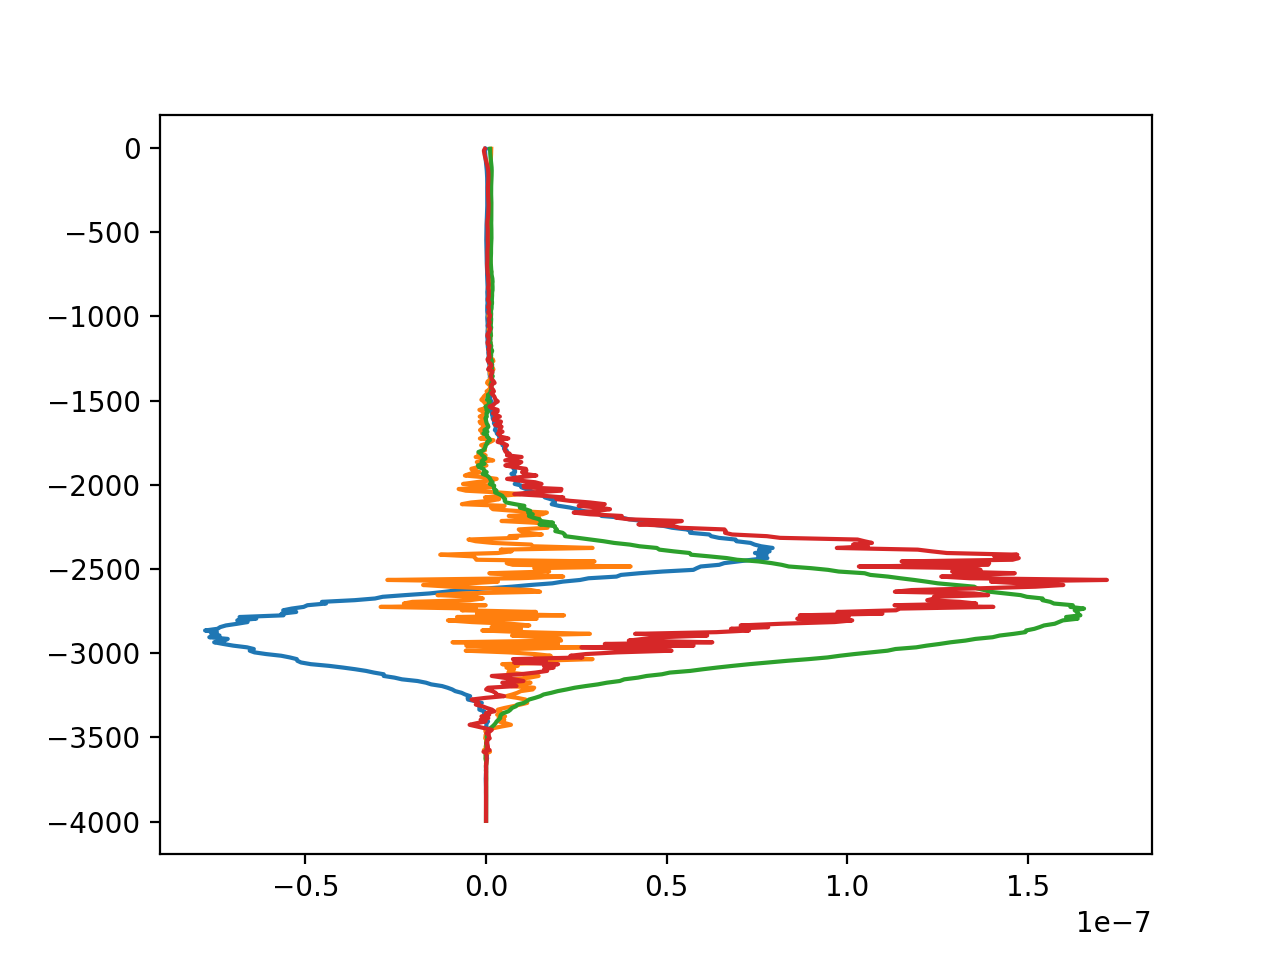

In [4]:
amps = np.array([155, 305, 610])
Bf = 0. * amps
for num, a in enumerate(amps):
    
    with xr.open_dataset('../reduceddata/EnergyDemeanLW1kmlowU10Amp%03dK18.nc' % a) as en:
        print(en)
        print(-en.dWPdz.sum().values * 10)
        area2 = en.area / 1e6
        Bf[num] = (en.Bf.sum().values  * 10 / area2)
        fig, ax = plt.subplots()
        ax.plot(-en.dWPdz / en.area , en.Z, label='dWP/dz %1.2f' % (-en.dWPdz.sum().values  * 10 / area2))
        ax.plot(en.dEdt / en.area, en.Z, label='dEdt %1.2f'  % (en.dEdt.sum().values  * 10 / area2))
        ax.plot(en.Bf / en.area, en.Z, label='Bf %1.2f' % (en.Bf.sum().values  * 10 / area2))
        ax.plot(en.resid / en.area, en.Z, label='Residual %1.2f' % (en.resid.sum().values  * 10 / area2))


<IPython.core.display.Javascript object>


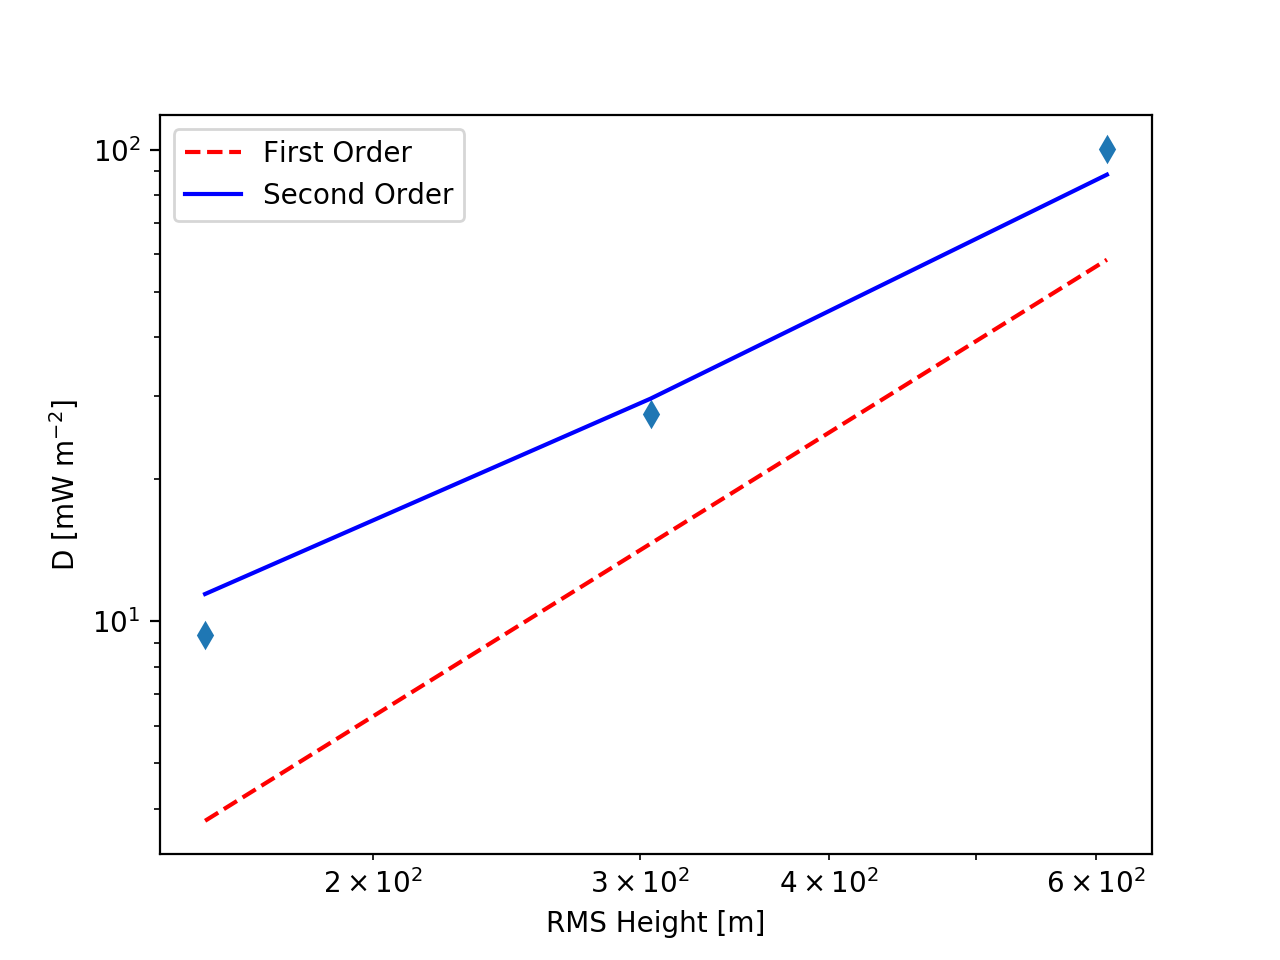

[0.64516129 0.32786885 0.16393443]
[1.55 3.05 6.1 ]


In [12]:
fig, ax = plt.subplots()
ax.loglog(amps, Bf, 'd')
#ax.loglog(amps, Bf[0] * amps**2/amps[0]**2, 'k--')
#ax.loglog(amps, Bf[0] * amps/amps[0], 'k--')
# ax.loglog(amps, (amps/amps[0])**2 * Bf[0], 'k')
N = 1e-3
U0 = 0.1

guess0 = 1000* 1000 * N * U0**2 * (amps)**2 * np.pi / 2. / 100e3
ax.loglog(amps, guess0, 'r--', label='First Order')

UNh = U0 / N / (amps)
print(UNh)
print(1./UNh)
guess1 = guess0 * (1 + np.pi * UNh) # - 2 * np.pi**2 * UNh**2)
ax.loglog(amps, guess1, 'b', label='Second Order')
ax.set_ylabel('D $[\mathrm{mW\ m^{-2}}]$')
ax.set_xlabel('RMS Height [m]')
ax.legend()


In [20]:
ds.WVEL[:, 20, 20]

<xarray.DataArray 'WVEL' (k_l: 400)>
array([  0.000000e+00,   1.931900e-05,   3.814881e-05, ...,   0.000000e+00,
         0.000000e+00,   0.000000e+00])
Coordinates:
    record   int32 2
    i        int32 20
    j        int32 20
  * k_l      (k_l) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
    XC       float64 2.018e+04
    YC       float64 1.896e+04
Attributes:
    description:  Vertical Component of Velocity (r_units/s)
    units:        m/s

<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
Data variables:
    Bf       (Z) float64 ...
    dWPdz    (Z) float64 ...
    dEdt     (Z) float64 ...
    resid    (Z) float64 ...
    area     float64 ...
-22.07327866053228


<IPython.core.display.Javascript object>


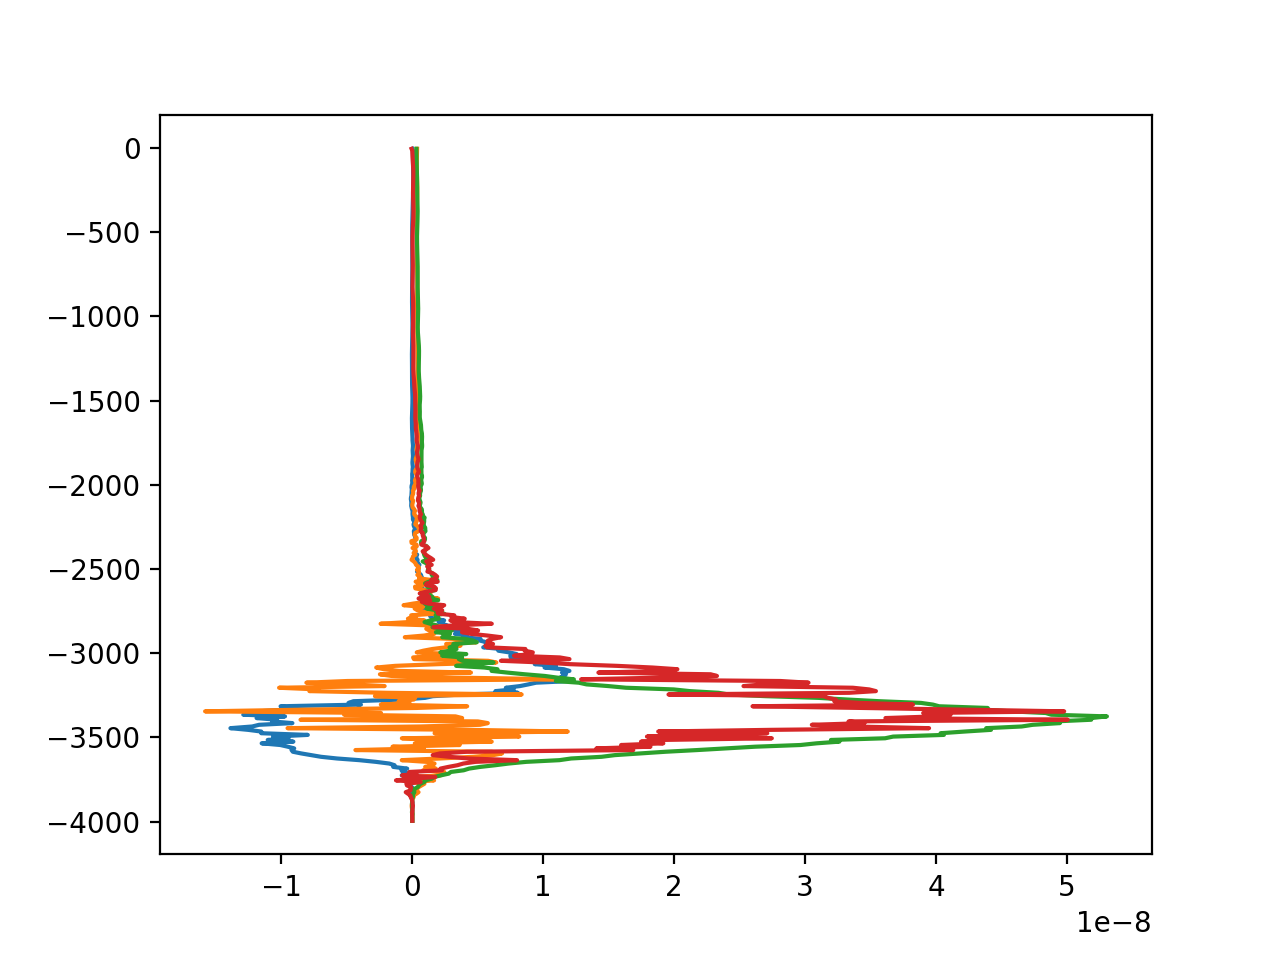

<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
Data variables:
    Bf       (Z) float64 ...
    dWPdz    (Z) float64 ...
    dEdt     (Z) float64 ...
    resid    (Z) float64 ...
    area     float64 ...
-34.72646221000443


<IPython.core.display.Javascript object>


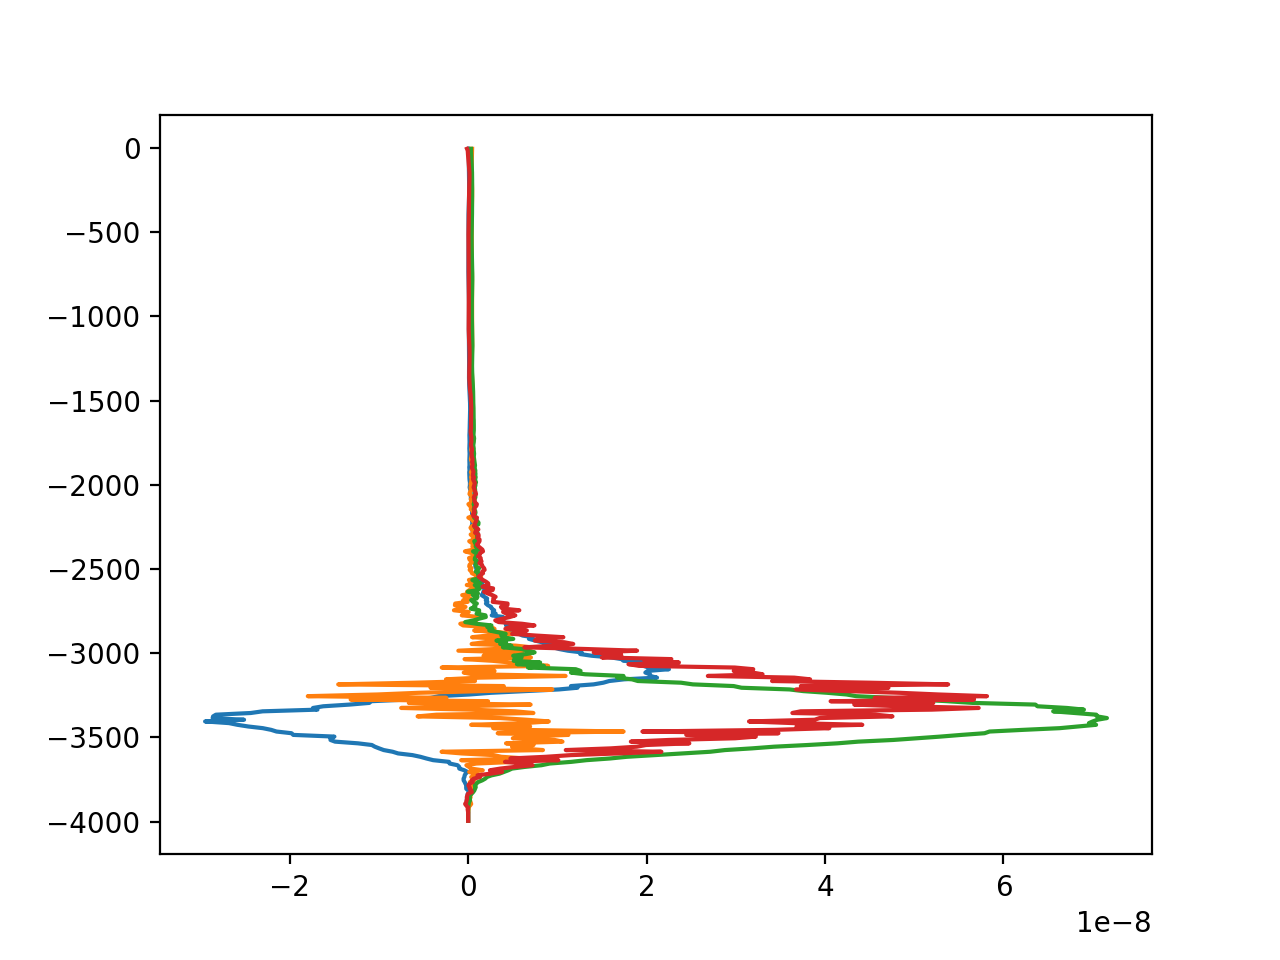

<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
Data variables:
    Bf       (Z) float64 ...
    dWPdz    (Z) float64 ...
    dEdt     (Z) float64 ...
    resid    (Z) float64 ...
    area     float64 ...
12.317005052199114


<IPython.core.display.Javascript object>


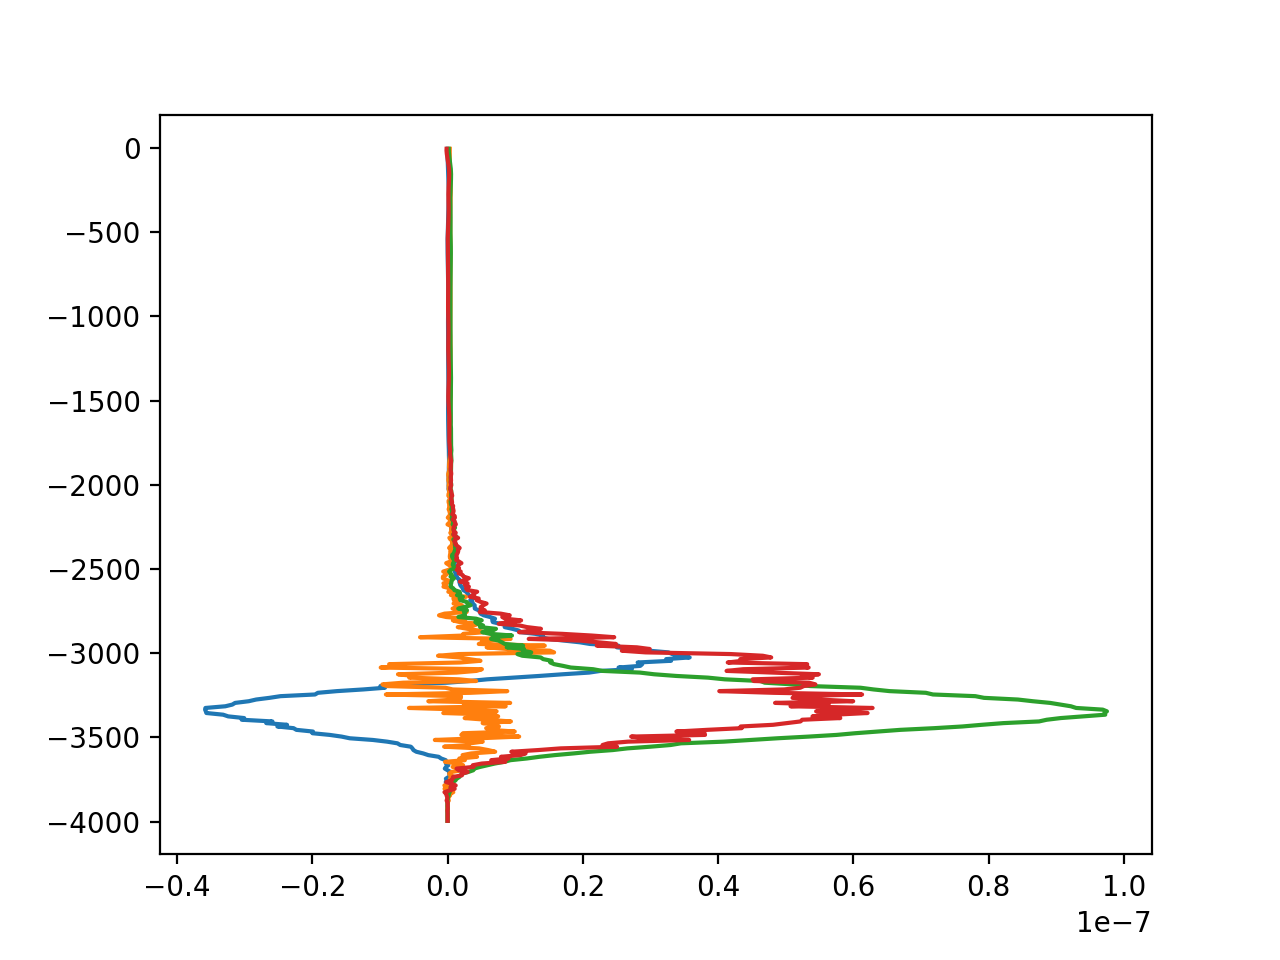

In [13]:
Ks = np.array([10, 18, 36])
Bf = 0. * Ks
for num, k in enumerate(Ks):
    
    with xr.open_dataset('../reduceddata/EnergyDemeanLW1kmlowU10Amp305K%02dL18.nc' % k) as en:
        print(en)
        print(-en.dWPdz.sum().values * 10)
        area2 = en.area / 1e6
        Bf[num] = (en.Bf.sum().values  * 10 / area2)
        fig, ax = plt.subplots()
        ax.plot(-en.dWPdz / en.area , en.Z, label='dWP/dz %1.2f' % (-en.dWPdz.sum().values  * 10 / area2))
        ax.plot(en.dEdt / en.area, en.Z, label='dEdt %1.2f'  % (en.dEdt.sum().values  * 10 / area2))
        ax.plot(en.Bf / en.area, en.Z, label='Bf %1.2f' % (en.Bf.sum().values  * 10 / area2))
        ax.plot(en.resid / en.area, en.Z, label='Residual %1.2f' % (en.resid.sum().values  * 10 / area2))


<IPython.core.display.Javascript object>


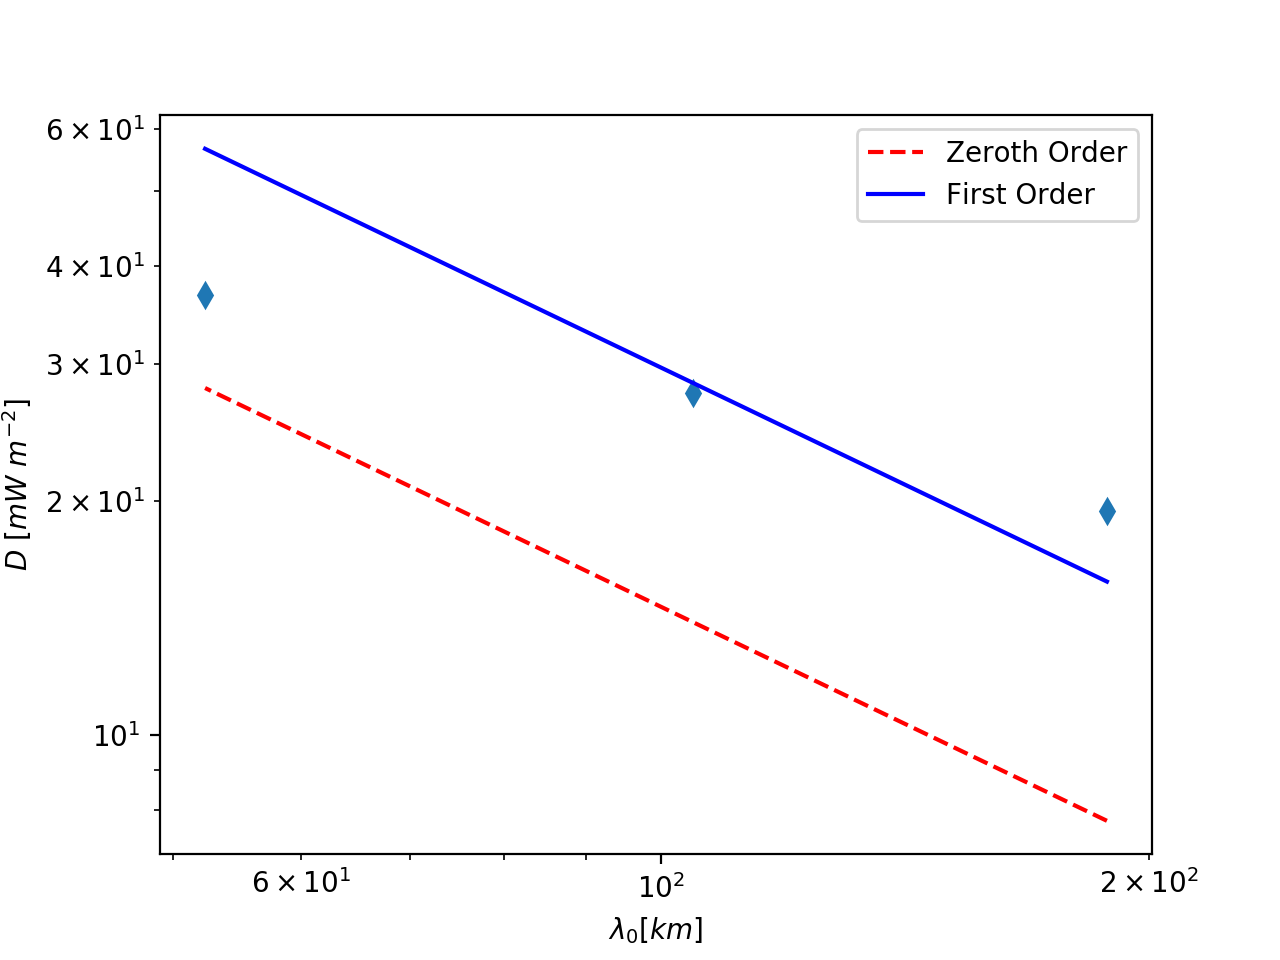

[188495.55921539 104719.75511966  52359.87755983]


In [22]:
fig, ax = plt.subplots()
k = Ks * 1e-4 / 10
lam =  2* np.pi / k * 3
ax.loglog(lam/1e3, Bf, 'd')
# ax.loglog(amps, (amps/amps[0])**2 * Bf[0], 'k')
N = 1e-3
U0 = 0.1
print(lam)
amps = 305
guess0 = 1000* 1000 * N * U0**2 * (amps)**2 * np.pi / 2. / lam
ax.loglog(lam/1e3, guess0, 'r--', label='Zeroth Order')

UNh = U0 / N / (amps)
guess1 = guess0 * (1 + np.pi * UNh) # - 2 * np.pi**2 * UNh**2)
ax.loglog(lam/1e3, guess1, 'b', label='First Order')
ax.set_xlabel('$\lambda_0 [km]$')
ax.set_ylabel('$D\ [mW\ m^{-2}]$')
ax.legend()

<IPython.core.display.Javascript object>


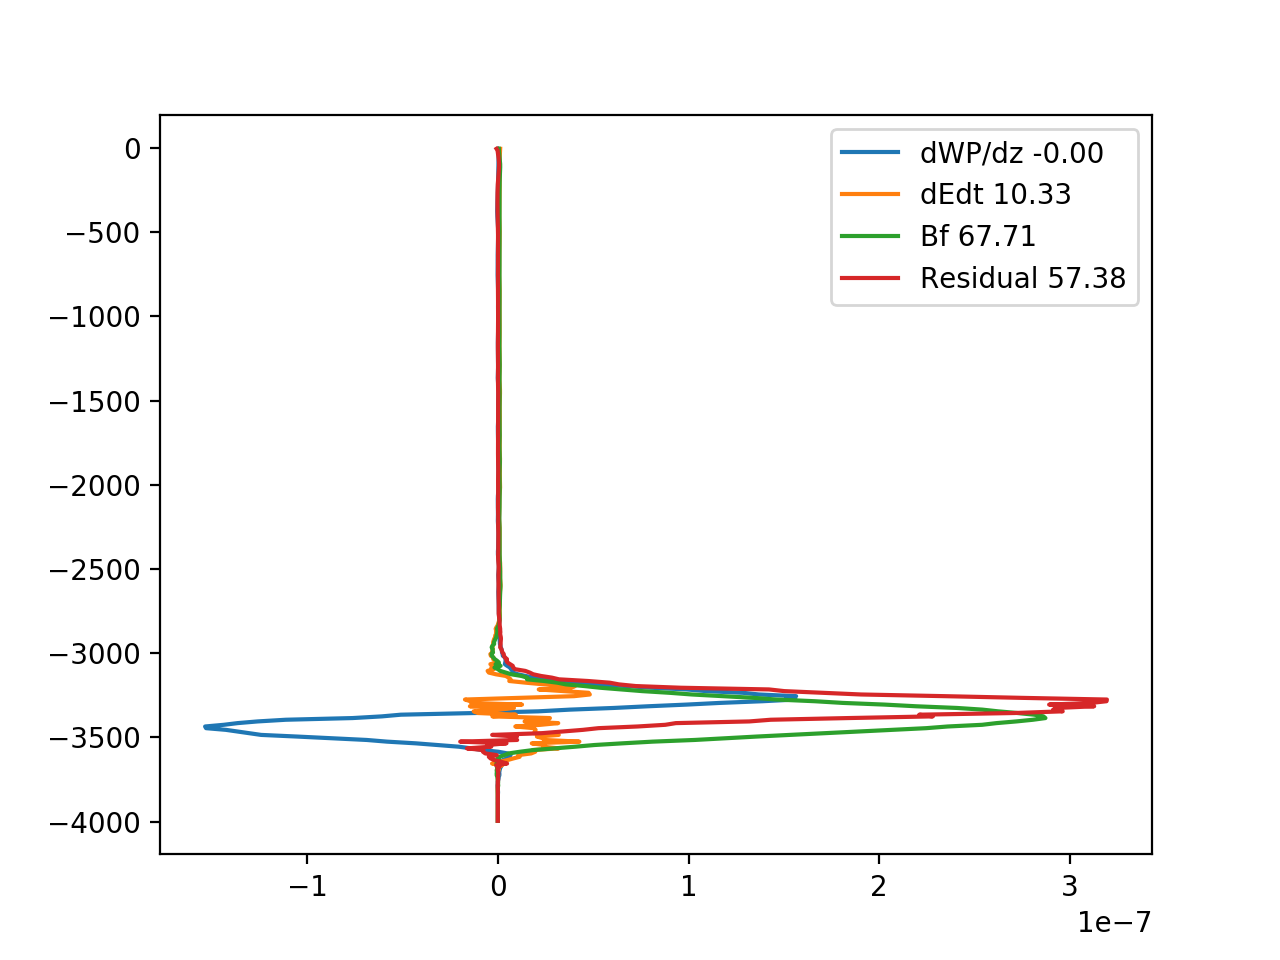

<IPython.core.display.Javascript object>


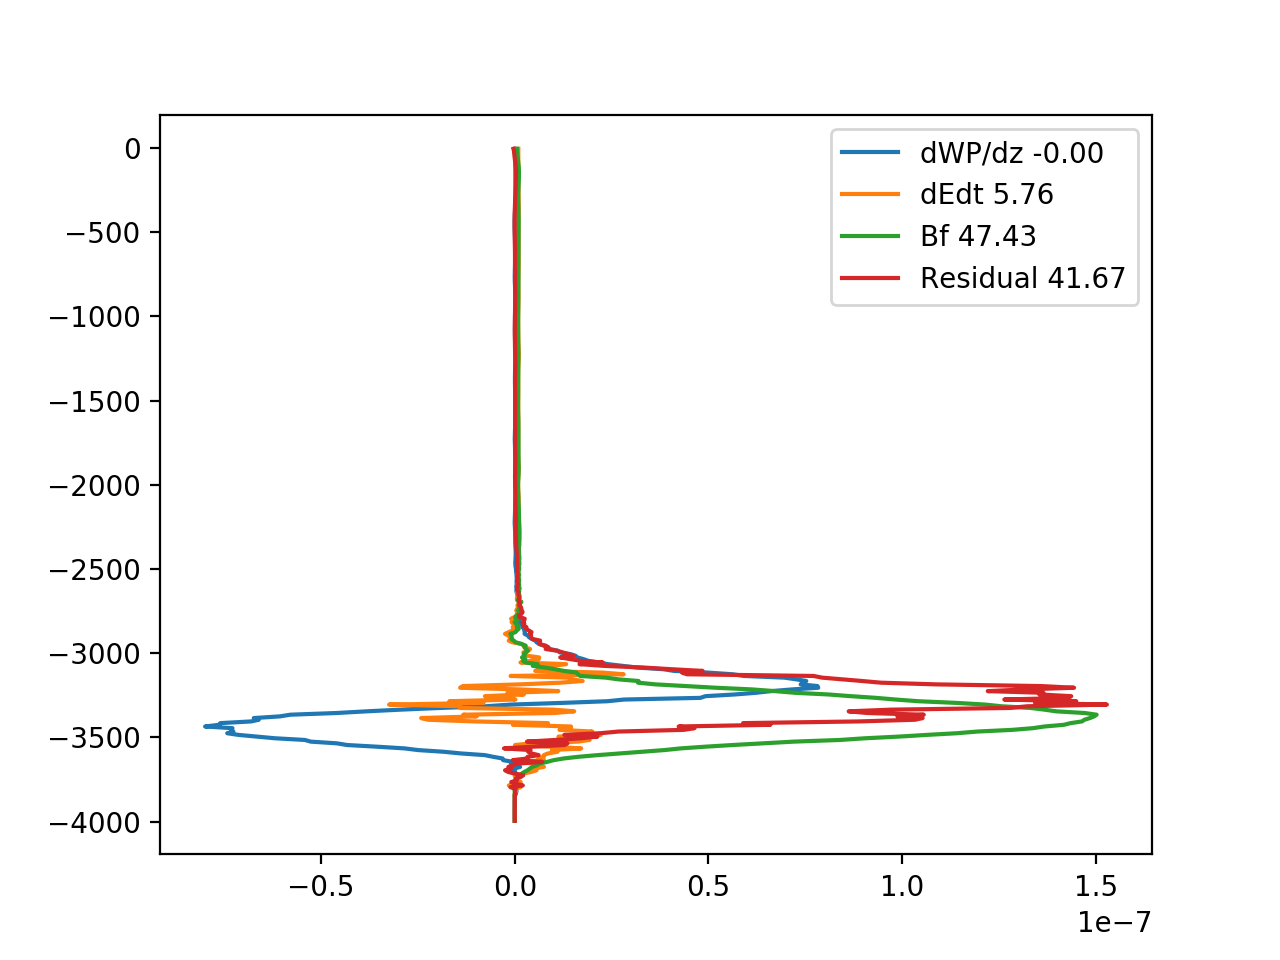

<IPython.core.display.Javascript object>


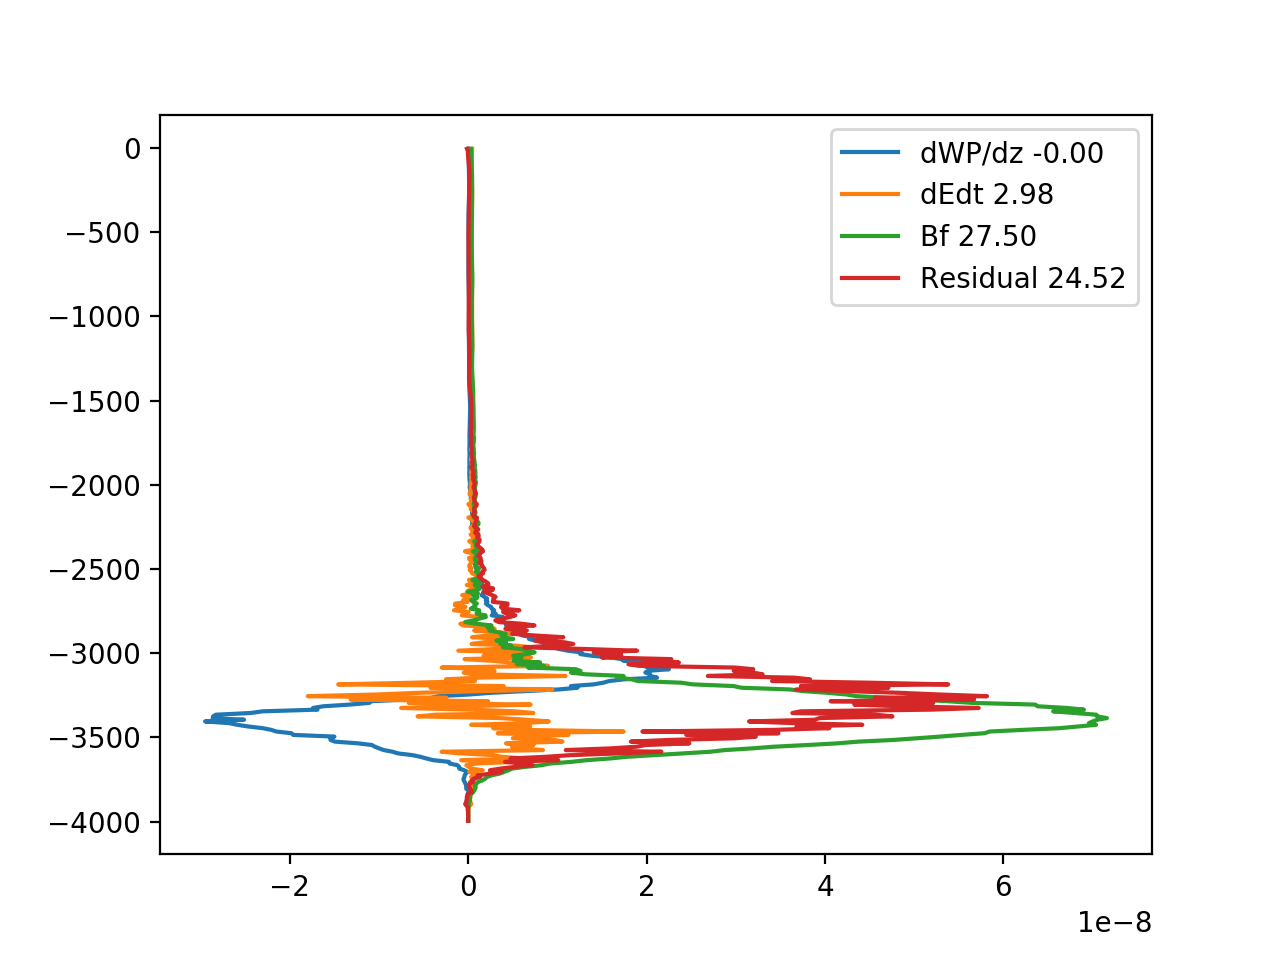

<IPython.core.display.Javascript object>


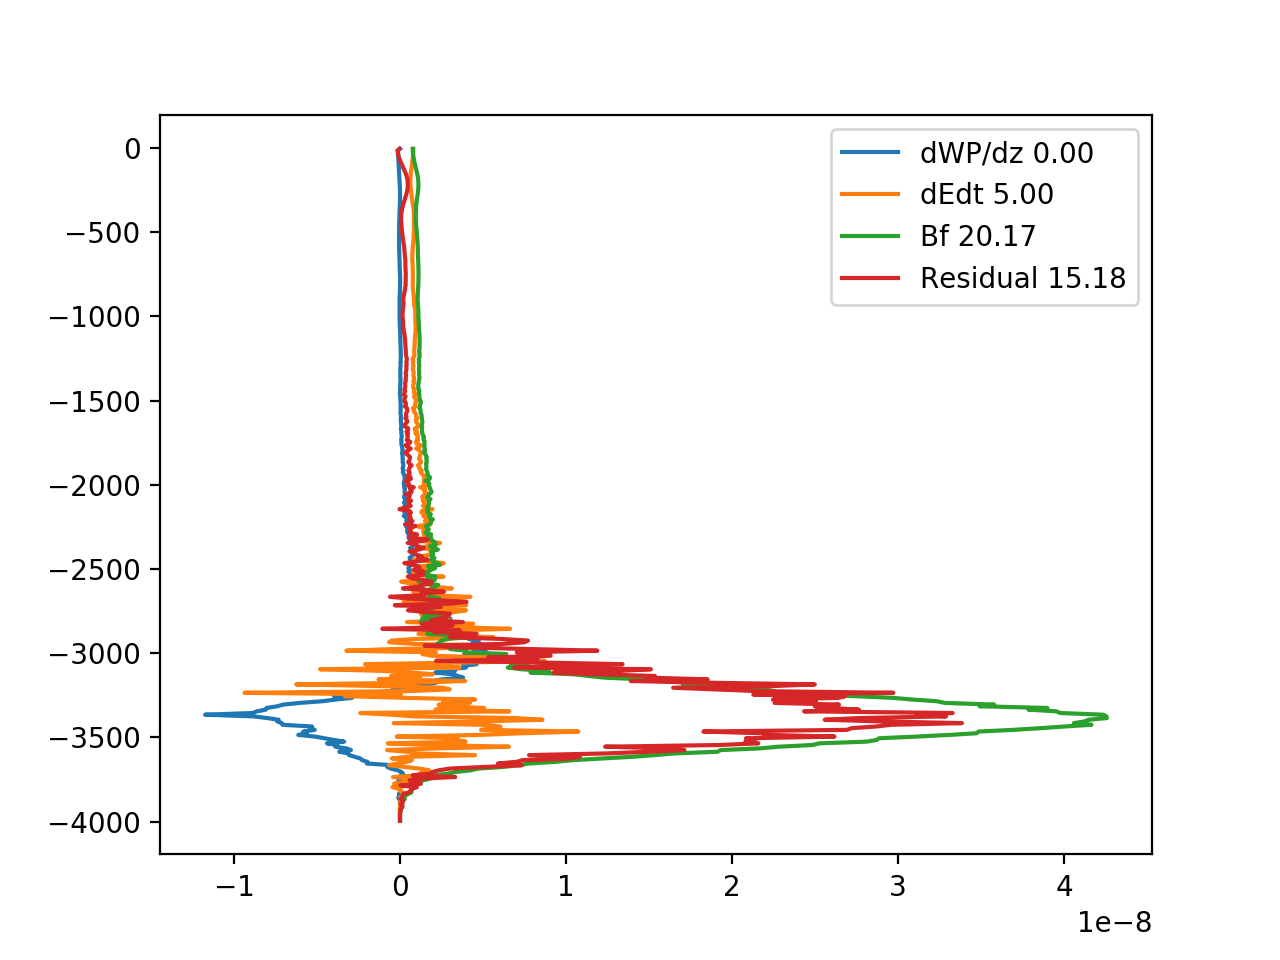

In [2]:
Ns = np.array([4, 2, 1, 0.5])
Bf = 0. * Ns
for num, k in enumerate(Ns):
    if k == 1:
        fname = '../reduceddata/EnergyDemeanLW1kmlowU10Amp305K18.nc'
    else:
        fname = '../reduceddata/EnergyDemeanLW1kmlowU10Amp305N%04d.nc' % (k*10)
    with xr.open_dataset(fname) as en:
        area2 = en.area / 1e6
        Bf[num] = (en.Bf.sum().values  * 10 / area2)
        fig, ax = plt.subplots()
        ax.plot(-en.dWPdz / en.area , en.Z, label='dWP/dz %1.2f' % (-en.dWPdz.sum().values  * 10 / area2))
        ax.plot(en.dEdt / en.area, en.Z, label='dEdt %1.2f'  % (en.dEdt.sum().values  * 10 / area2))
        ax.plot(en.Bf / en.area, en.Z, label='Bf %1.2f' % (en.Bf.sum().values  * 10 / area2))
        ax.plot(en.resid / en.area, en.Z, label='Residual %1.2f' % (en.resid.sum().values  * 10 / area2))
        ax.legend()

<IPython.core.display.Javascript object>


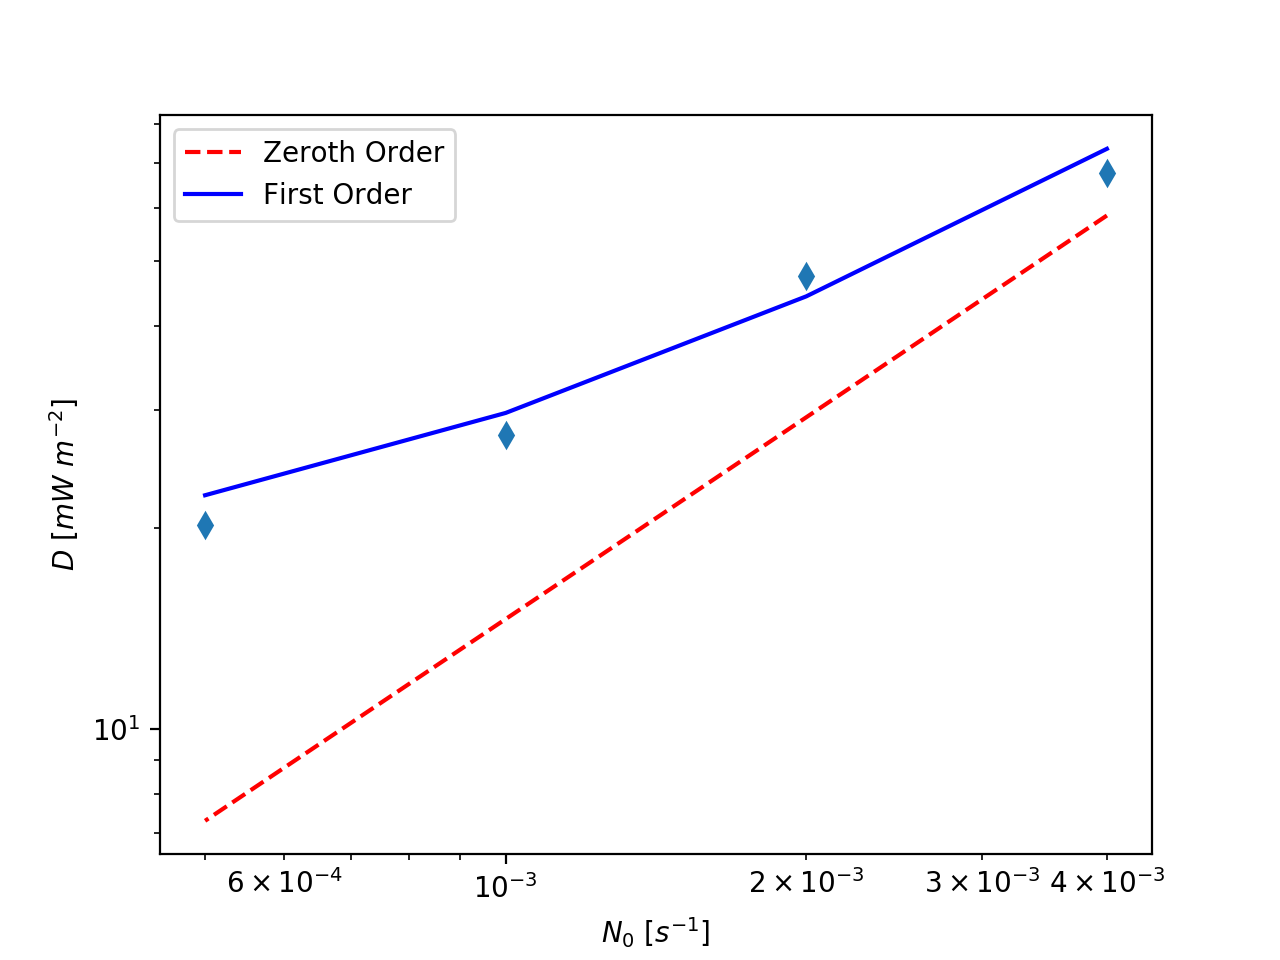

In [23]:
fig, ax = plt.subplots()
N = np.array([4e-3, 2e-3, 1e-3, 5e-4])
ax.loglog(N, Bf, 'd')
# ax.loglog(amps, (amps/amps[0])**2 * Bf[0], 'k')
U0 = 0.1
amps = 305
guess0 = 1000* 1000 * N * U0**2 * (amps)**2 * np.pi / 2. / 100e3
ax.loglog(N, guess0, 'r--', label='Zeroth Order')

UNh = U0 / N / (amps)
guess1 = guess0 * (1 + np.pi * UNh) # - 2 * np.pi**2 * UNh**2)
ax.loglog(N, guess1, 'b', label='First Order')
ax.set_xlabel('$N_0\ [s^{-1}]$')
ax.set_ylabel('$D\ [mW\ m^{-2}]$')
ax.legend()

<IPython.core.display.Javascript object>


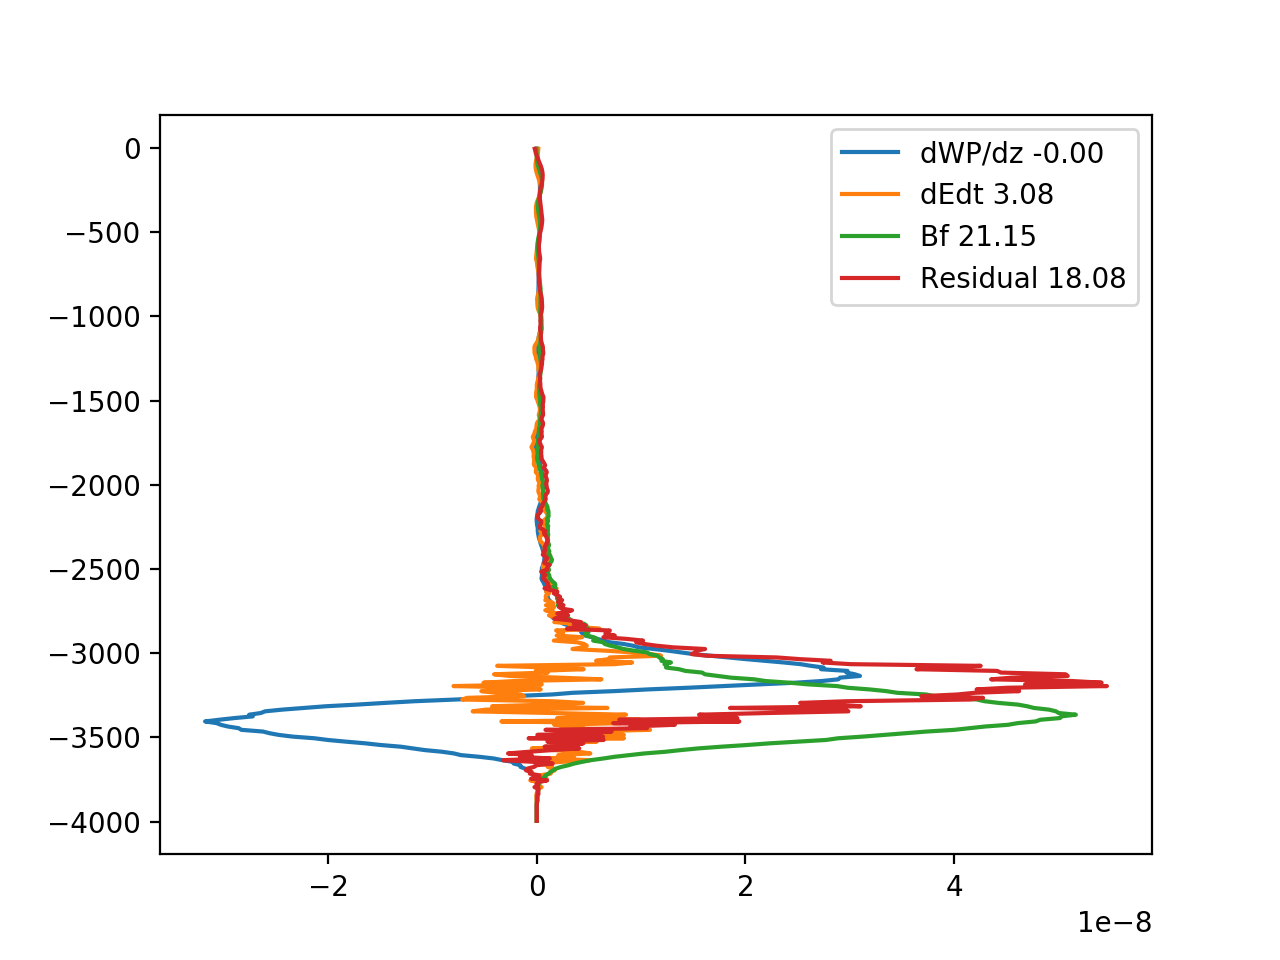

<IPython.core.display.Javascript object>


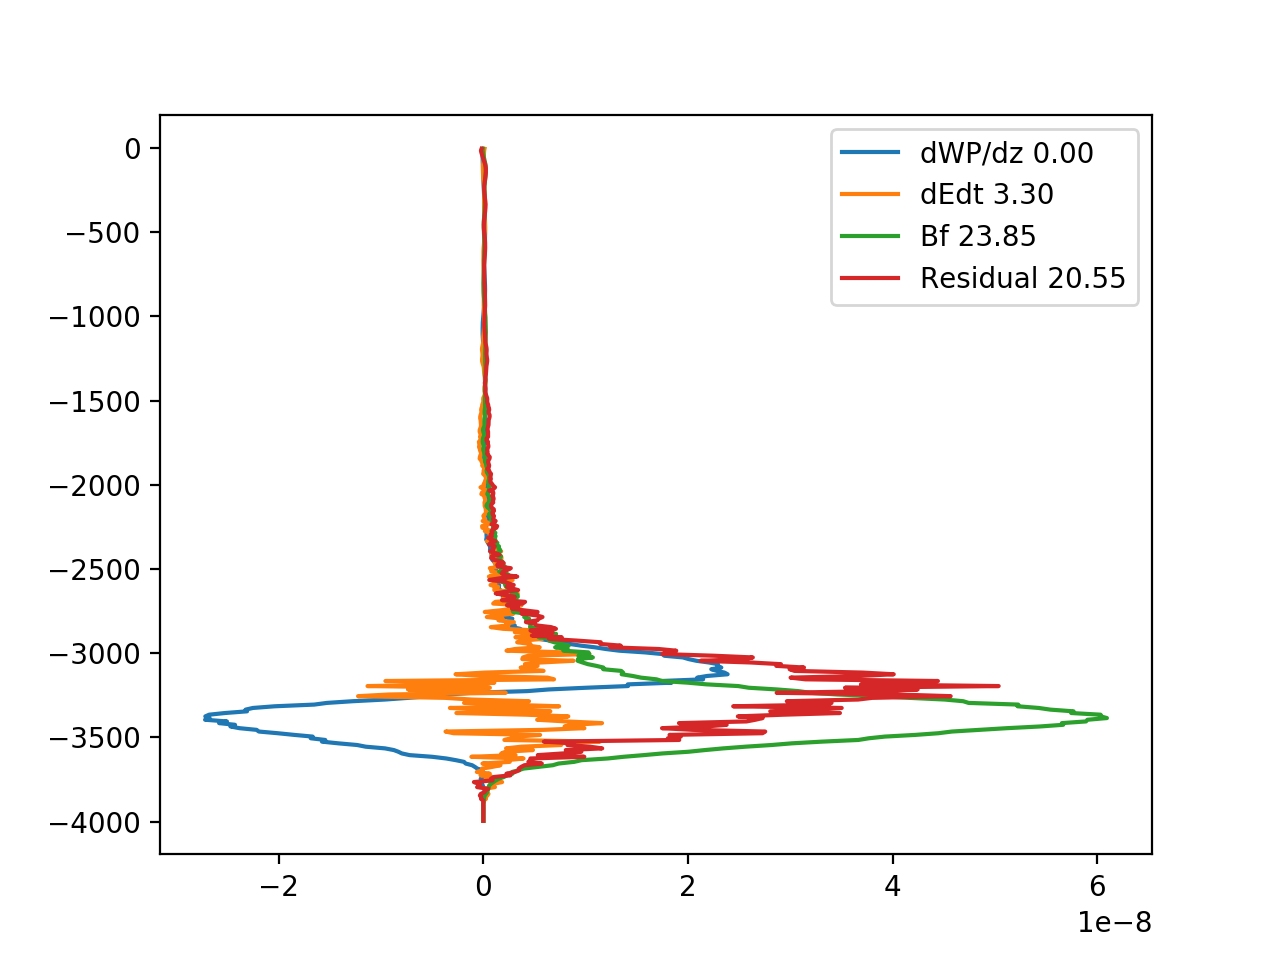

<IPython.core.display.Javascript object>


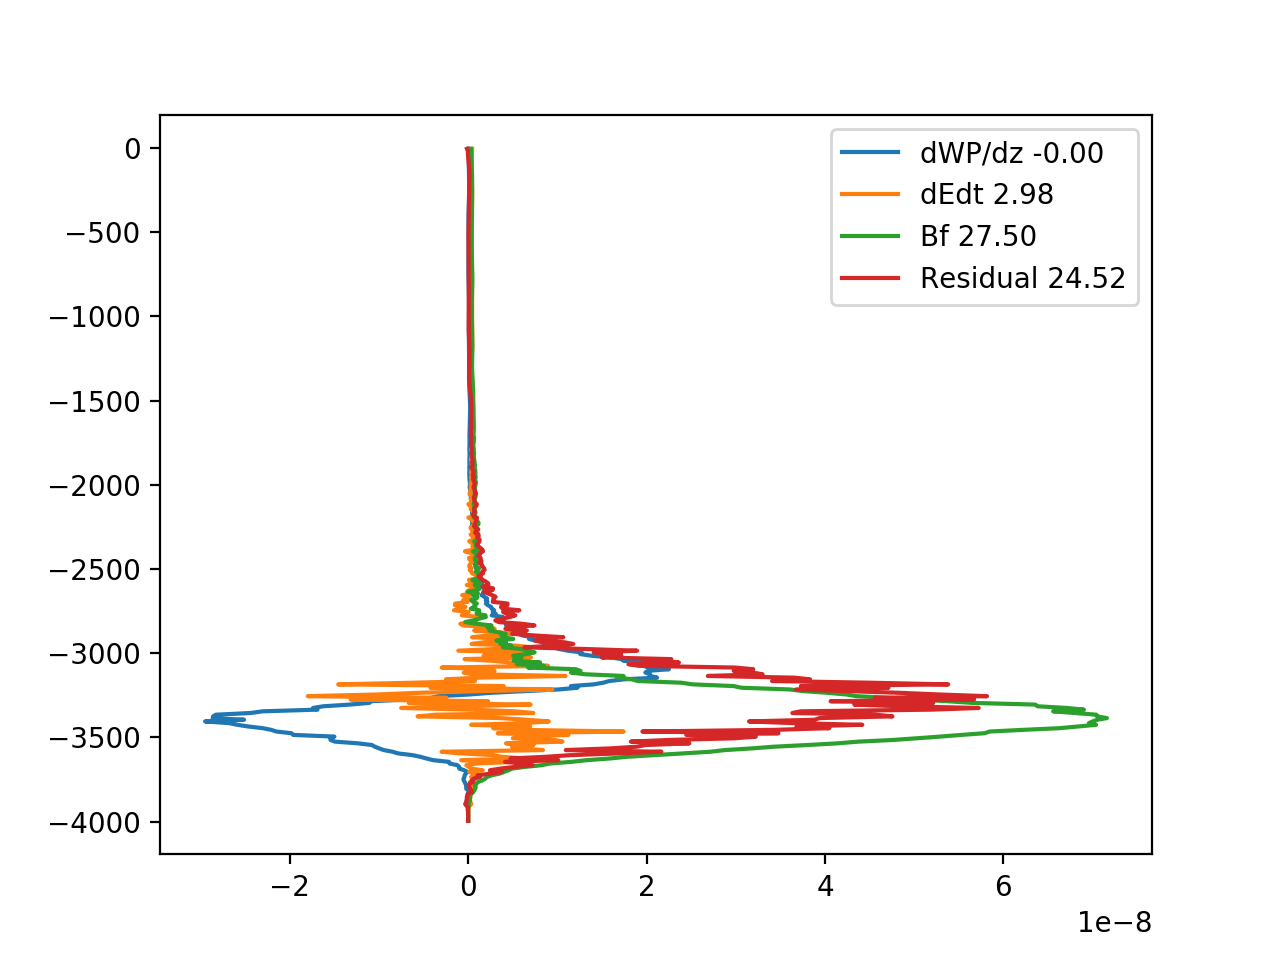

<IPython.core.display.Javascript object>


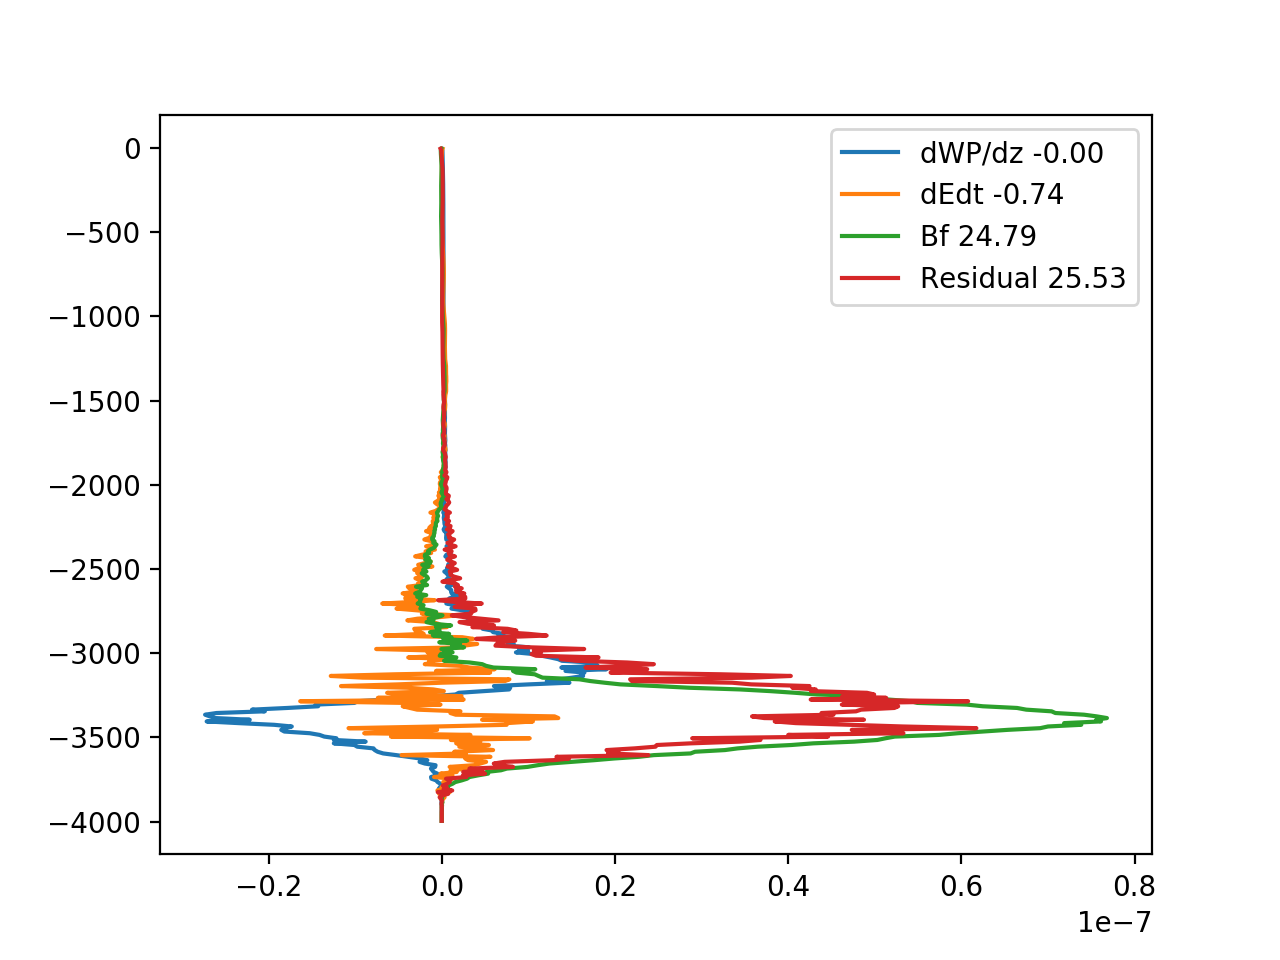

<IPython.core.display.Javascript object>


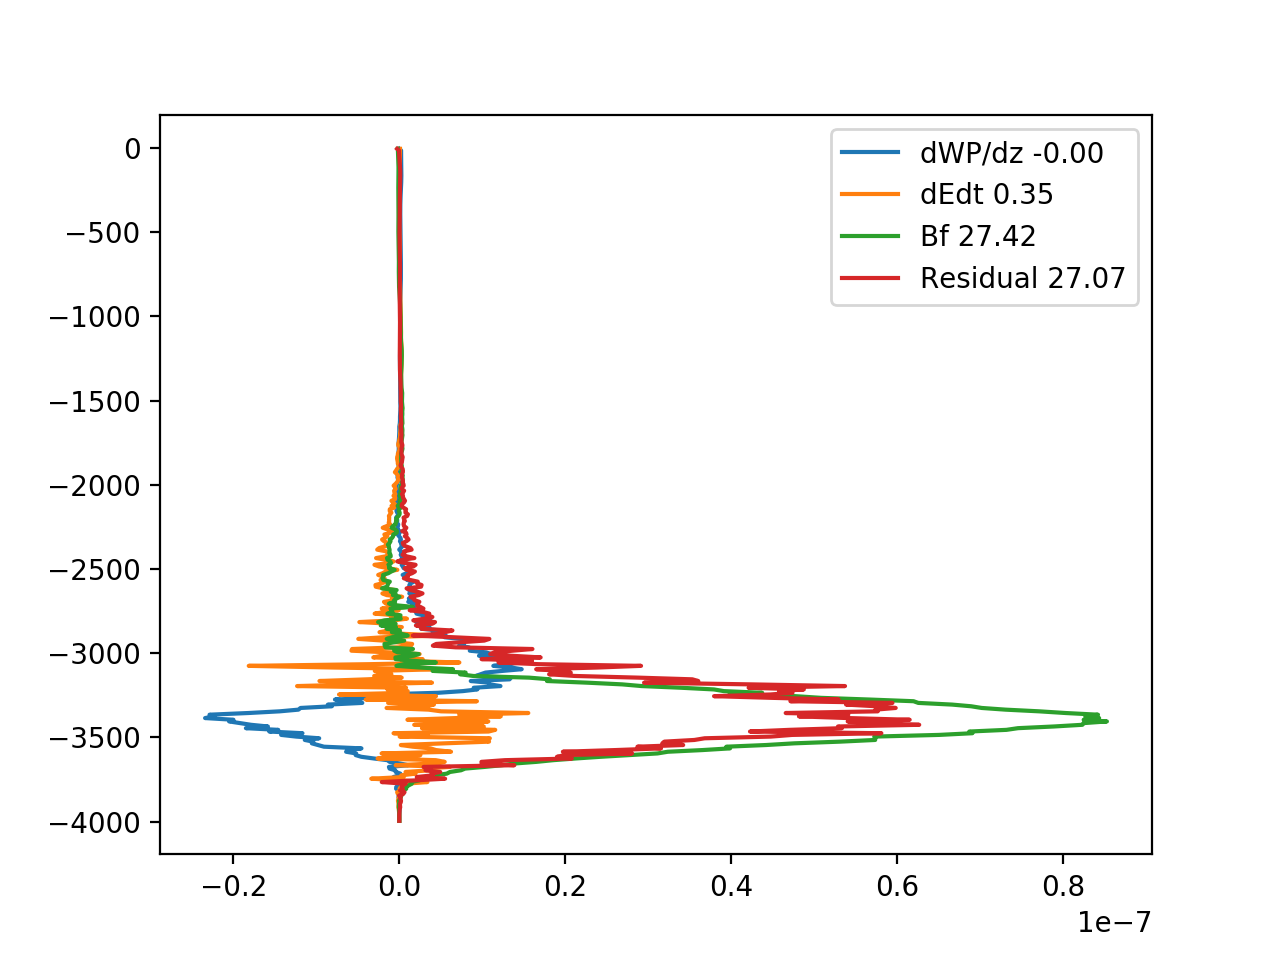

In [32]:
Ns = np.array([38, 73, 100, 126, 141])
Bf = 0. * Ns
for num, k in enumerate(Ns):
    if k == 100:
        fname = '../reduceddata/EnergyDemeanLW1kmlowU10Amp305K18.nc'
    else:
        fname = '../reduceddata/EnergyDemeanLW1kmlowU10Amp305f%03d.nc' % (k)
    with xr.open_dataset(fname) as en:
        area2 = en.area / 1e6
        Bf[num] = (en.Bf.sum().values  * 10 / area2)
        fig, ax = plt.subplots()
        ax.plot(-en.dWPdz / en.area , en.Z, label='dWP/dz %1.2f' % (-en.dWPdz.sum().values  * 10 / area2))
        ax.plot(en.dEdt / en.area, en.Z, label='dEdt %1.2f'  % (en.dEdt.sum().values  * 10 / area2))
        ax.plot(en.Bf / en.area, en.Z, label='Bf %1.2f' % (en.Bf.sum().values  * 10 / area2))
        ax.plot(en.resid / en.area, en.Z, label='Residual %1.2f' % (en.resid.sum().values  * 10 / area2))
        ax.legend()

<IPython.core.display.Javascript object>


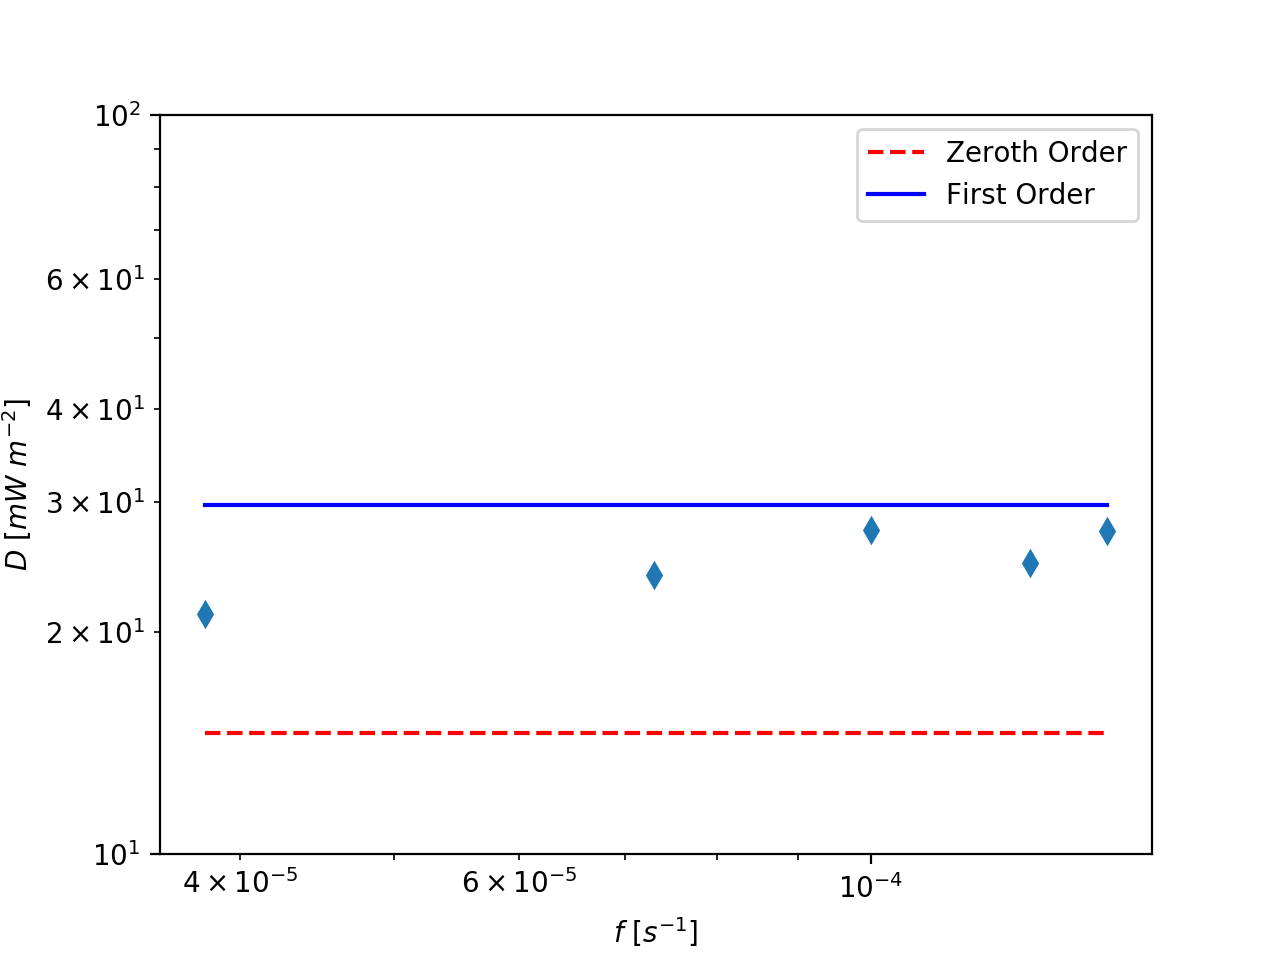

In [45]:
fig, ax = plt.subplots()
f = np.array([38, 73, 100, 126, 141])/1e6
lat = np.arange(15, 90, 15)
ax.loglog(f, Bf, 'd')
# ax.loglog(amps, (amps/amps[0])**2 * Bf[0], 'k')
U0 = 0.1
amps = 305
guess0 = 1000* 1000 * 1e-3 * U0**2 * (amps)**2 * np.pi / 2. / 100e3
ax.plot(f, guess0 + 0*f, 'r--', label='Zeroth Order')

UNh = U0 / 1e-3 / (amps)
guess1 = guess0 * (1 + np.pi * UNh) # - 2 * np.pi**2 * UNh**2)
ax.plot(f, guess1 + 0*f, 'b', label='First Order')
ax.set_xlabel('$f\ [s^{-1}]$')
ax.set_ylabel('$D\ [mW\ m^{-2}]$')
ax.set_ylim([10, 100])
ax.legend()